<a href="https://colab.research.google.com/github/ytallosv/Data-science/blob/master/Analisando_dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [Ytallo S. Veras](https://www.linkedin.com/in/ytallo-silva-veras-/)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Hong Konh, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados
Todos os dados aqui usados foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para esta análise exploratória inicial, será baixado apenas o seguinte arquivo: 

* `listings.csv`-*Summary information and metrics for listings in Hong Kong (goo for visualisations).*



In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/china/hk/hong-kong/2020-06-15/visualisations/listings.csv")

## Análise dos Dados

Nesta etapa, temos como objetivo compreender a situação como um tudo e proporcionar uma interpretação da estruturação dos dados.


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,69074,https://www.airbnb.com/rooms/69074,20200615133603,2020-06-17,Beautiful oasis of plants & art @ best location,An ideal Hong location any visitor--hip withou...,"Filled with plants and art, this one bedroom u...",An ideal Hong location any visitor--hip withou...,none,"In the upper part of trendy, hip Sheung Wan, w...",NaN,Buses pass often along Hollywood Road and taxi...,"All access, except one section of the wardrobe.","If a guest is staying there, I am likely abroa...",Everything to make your stay as comfortable as...,NaN,NaN,https://a0.muscache.com/im/pictures/84364564/1...,NaN,160139,https://www.airbnb.com/users/show/160139,Amy,2010-07-07,Hong Kong,"I've been with AirBnB now for many years, ofte...",within a few hours,86%,60%,t,https://a0.muscache.com/im/users/160139/profil...,https://a0.muscache.com/im/users/160139/profil...,Sheung Wan,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Sheung Wan, Hong Kong",Central & Western District,Central & Western,...,$155.00,3,365,3,4,365,365,3.1,365.0,2 months ago,t,0,23,53,143,2020-06-17,134,4,2011-02-14,2020-03-24,97.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.18
1,75083,https://www.airbnb.com/rooms/75083,20200615133603,2020-06-17,SoHo off Hollywood Road 3B,"Located steps from Hollywood road, with new ea...","Located on Hollywood Road, walking distance to...","Located steps from Hollywood road, with new ea...",none,NaN,"Once you arrive in Hong Kong, everything is qu...",The Sheung Wan MTR station is but 5 min walkin...,Guests have access to: - FREE WiFi - Cable TV ...,As much as possible or invisible if you want. ...,This is a Strictly NON SMOKING Flat. UPON ARRI...,NaN,NaN,https://a0.muscache.com/im/pictures/2873745/90...,NaN,304876,https://www.airbnb.com/users/show/304876,Brend,2010-11-30,Hong Kong,I was born in California and raised in Hong Ko...,within an hour,100%,99%,f,https://a0.muscache.com/im/users/304876/profil...,https://a0.muscache.com/im/users/304876/profil...,Sheung Wan,12.0,12.0,"['email', 'phone', 'reviews', 'jumio', 'selfie...",t,f,"Sheung Wan, Hong Kong",Central & Western District,Central & Western,...,$155.00,14,365,14,14,365,365,14.0,365.0,7 weeks ago,t,0,0,14,193,2020-06-17,229,1,2011-03-05,2020-04-18,89.0,8.0,9.0,9.0,9.0,10.0,9.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,13,9,4,0,2.02
2,103760,https://www.airbnb.com/rooms/103760,20200615133603,2020-06-17,Central Centre 5 min walk to/from Central MTR,"Located right in the heart of Central, this 2 ...",You really can't ask for a be

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Prosseguindo, iremos identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de dados que temos em cada coluna.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv`. Há uma versão mais completa com 11187 entradas e 106 variáveis (`listings.csv.gz`).

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 11187
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* está diretamente relacionada à quantidade de valores ausentes. É importante entender logo de início se esses valores nulos são significativos comparados ao total de entradas.

* É possível ver que a coluna `neighbourhood_group`possui 100% dos seus valores faltantes.
* As variáveis `reviews_per_month`e `last_review` possuem valores nulos em quase metade das linhas.
* As variáveis `name`e `host_name`têm aproximadamente 0,1% dos valores nulos.


In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.371413
last_review                       0.371413
host_name                         0.001073
name                              0.000715
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição das variáveis, irei plotar o histograma.

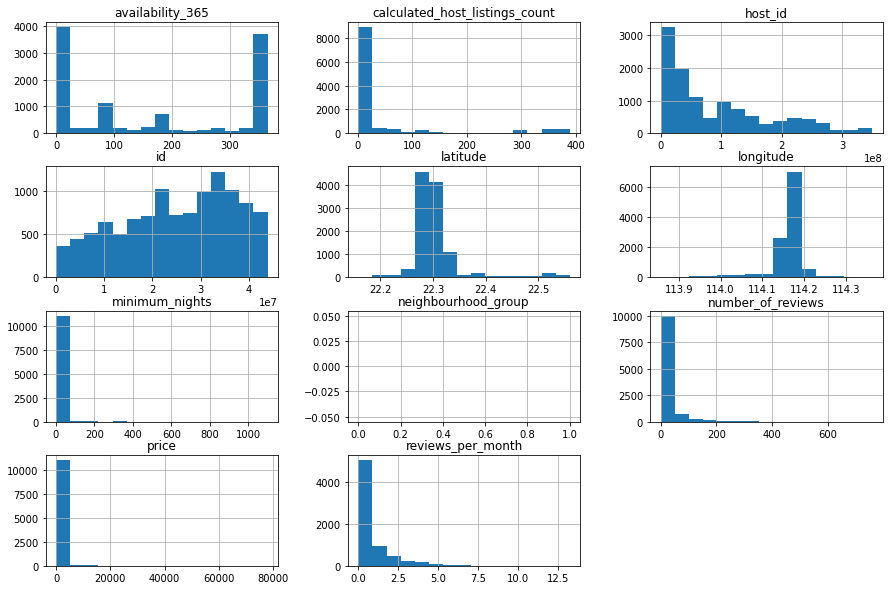

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis `price`, `minimum_nights`e `calculated_host_listings_count`.

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots`para a variável.

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].describe()


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,11187.000000,11187.000000,11187.000000,7032.000000,11187.000000,11187.000000
mean,742.120944,9.764280,17.695361,0.836564,45.667203,167.805935
std,1890.475742,28.266606,41.248188,1.182850,102.530982,156.996489
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,295.000000,1.000000,0.000000,0.120000,1.000000,0.000000
50%,481.000000,2.000000,2.000000,0.350000,4.000000,108.000000
75%,798.000000,7.000000,14.000000,1.030000,19.000000,364.000000
max,77999.000000,1100.000000,757.000000,13.230000,389.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price`possui 75% do valor abaixo de 798, no entanto, seu valor máximo é 77999.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

###Boxplot para minimum_nights

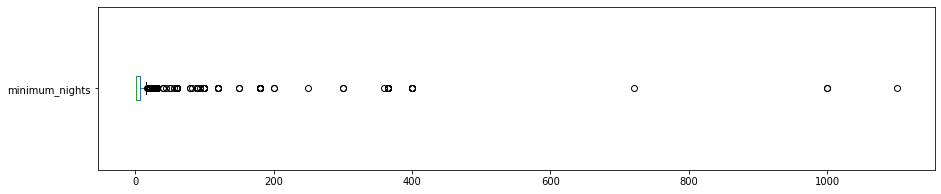

minimum_nights: valores acima de 30:
287 entradas
2.5655%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

###Boxplot para price

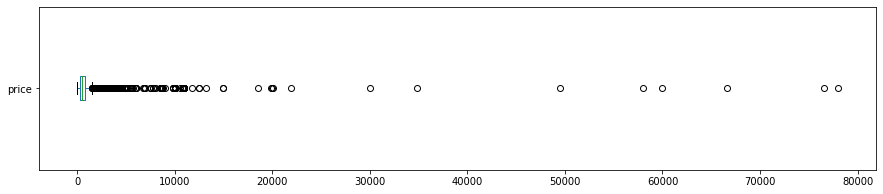


price: Valores acima de 1500
762 entradas
6.8115%


In [ ]:
# price 
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: Valores acima de 1500")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))



###Histogramas sem outliers

Já que identificamos outliers nas variáveis `price`e `minimum_nights`, vamos agora limprar o DataFrame delas e plotar novamente o histograma.

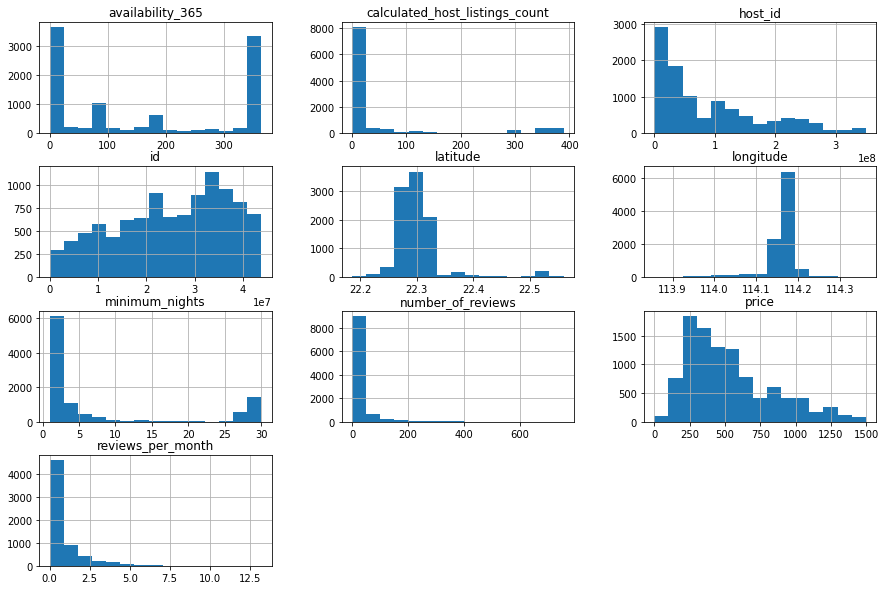

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a correlação existente entre as variáveis**

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()


# mostrar a matriz de correlação
display(corr)


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.218031,0.060131,0.000212,-0.328482,-0.219921
minimum_nights,-0.218031,1.000000,-0.176836,-0.102319,0.689889,0.393560
number_of_reviews,0.060131,-0.176836,1.000000,0.834936,-0.148378,0.014630
reviews_per_month,0.000212,-0.102319,0.834936,1.000000,-0.056012,0.076443
calculated_host_listings_count,-0.328482,0.689889,-0.148378,-0.056012,1.000000,0.419342
availability_365,-0.219921,0.393560,0.014630,0.076443,0.419342,1.000000


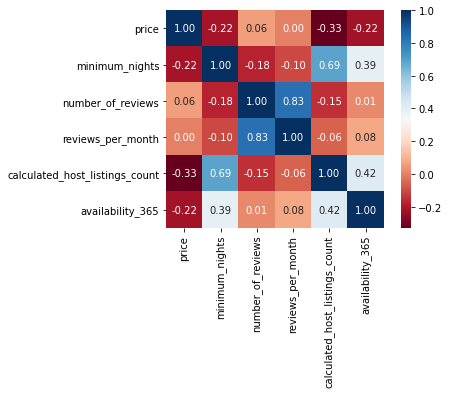

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Private room       5092
Entire home/apt    4253
Shared room         578
Hotel room          230
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Private room       0.501527
Entire home/apt    0.418891
Shared room        0.056929
Hotel room         0.022653
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. No caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Kwai Tsing           722.368421
Islands              655.697674
Central & Western    646.946673
Tsuen Wan            643.395833
Southern             615.772727
Sai Kung             550.453125
Kwun Tong            535.760870
Wong Tai Sin         532.285714
Wan Chai             519.294465
Kowloon City         518.188235
Name: price, dtype: float64

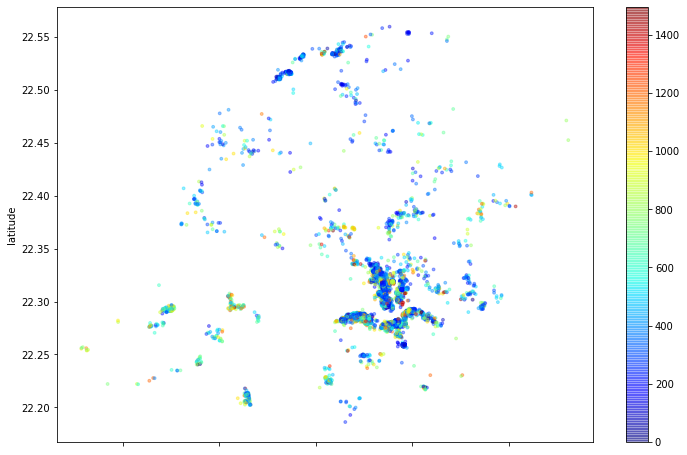

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

Podemos observar abaixo que a média do mínimo de noites segue o padrão mundial de 2 dias; podemos relacionar este número ao fim de semana, onde as pessoas alugam casas/apartamentos para viagens e passeios curtos.


In [ ]:
# ver a média da coluna `minimum_nights``
df_clean['minimum_nights'].describe()

count    10153.000000
mean         7.571358
std         10.835363
min          1.000000
25%          1.000000
50%          2.000000
75%          7.000000
max         30.000000
Name: minimum_nights, dtype: float64

## Conclusões


Após essa breve análise, podemos chegar a conclusão de que um *Dataset* deve ser analisado pronfundamente, de modo que os *Outliers* e *Dados faltantes* podem levar a uma grande distorção de informações e consequentemente a análises e tomadas de decisões equivocadas.

No entanto, também podemos observar alguns padrões que se seguem em todo o mundo ao tratarmos do modelo de negócio do Airbnb, como por exemplo a média do número minimo de noites para locação. Pode-se observar também que no caso específico de Hong Kong, não possuimos uma área tão concentrada de locais disponiveis para locação, sendo  assim uma zona mais distribuida, como podemos observar no mapa.

Por fim, seria necessária uma análise mais densa e profunda no *Dataset* detalhado para uma extração melhor de informações e para uma melhor possível tomada de decisão, atividade essencial do Data Science.